## 路透社数据集

包含许多短新闻及其对应的主题，包括46个不同的主题。

### 加载数据集

In [1]:
from keras.datasets import reuters

#限定前10000个最常出现的单词
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)    

Using TensorFlow backend.


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


每个样本都是一个整数列表，表示单词索引

In [3]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


### 将索引解码为新闻文本

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

样本对应的标签是一个0～45范围内的整数，即话题索引编号。

In [5]:
train_labels[10]

3

## 准备数据

### 编码数据

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

#将数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

将标签向量化有两种方法：

    1、将标签列表转换为整数张量
    2、使用one-hot编码

In [7]:
def to_one_hot(lables, dimension=46):
    results = np.zeros((len(lables), dimension))
    for i, lable in enumerate(lables):
        results[i, lable] = 1
    return results

#将标签向量化
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Keras内置方法也可以实现这个操作，使用to_categorical()

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 构建网络

46个分类结果，中间2层隐藏层，每层64个神经元（relu），输出层用softmax，损失函数用分类交叉熵。

### 模型定义

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### 编译模型

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 验证你的方法

我们在训练集中留出1000个样本作为验证集。

### 留出验证集

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

开始训练，共20个轮次。

### 训练模型

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.5325 - acc: 0.4952 - val_loss: 1.7245 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.4503 - acc: 0.6868 - val_loss: 1.3507 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.1006 - acc: 0.7638 - val_loss: 1.1716 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.8728 - acc: 0.8148 - val_loss: 1.0822 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.7057 - acc: 0.8474 - val_loss: 0.9851 - val_acc: 0.7780
Epoch 6/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.5690 - acc: 0.8787 - val_loss: 0.9414 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.4618 - acc: 0.

### 绘制训练损失和验证损失

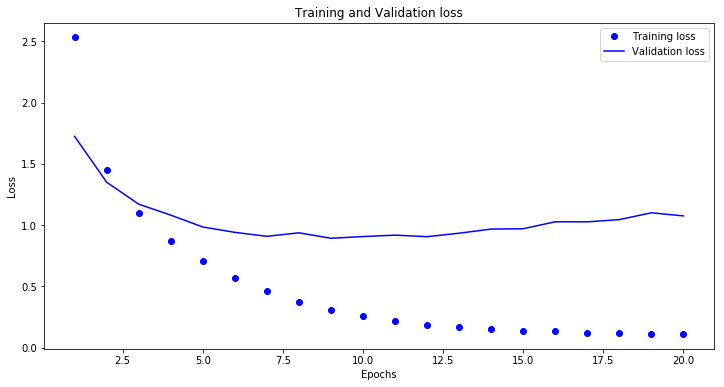

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 绘制训练精度和验证精度

<Figure size 432x288 with 0 Axes>

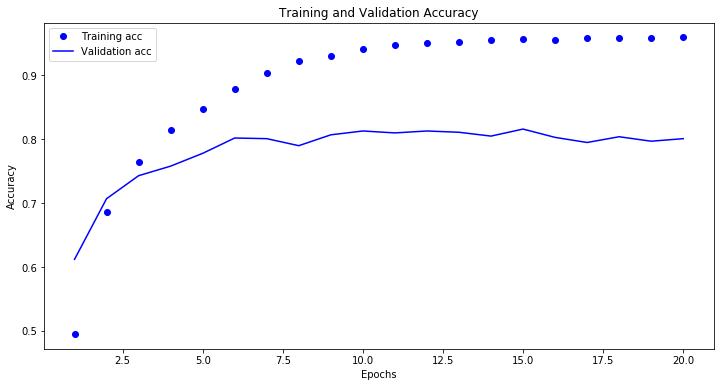

In [14]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(12,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

可见，网络在训练9轮后开始过拟合，从头开始训练一个新网络，共9个轮次，然后在测试集上评估模型。

### 从头开始训练一个模型

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

results = model.evaluate(x_test, one_hot_test_labels)

print('Test loss: {}\nTest accuracy: {}'.format(results[0],results[1]))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 126us/step - loss: 2.5367 - acc: 0.5233 - val_loss: 1.6823 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.3763 - acc: 0.7122 - val_loss: 1.2801 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.0195 - acc: 0.7793 - val_loss: 1.1371 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.8057 - acc: 0.8231 - val_loss: 1.0570 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.6468 - acc: 0.8612 - val_loss: 0.9788 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.5181 - acc: 0.8905 - val_loss: 0.9120 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.4165 - acc: 0.9129 - val_loss: 0.8966 - val_acc: 0.8210
Epoch 8/9
798

## 在新数据上生成预测结果

In [16]:
predictions = model.predict(x_test)

predicitons 中的每个元素都是长度为46的向量。

In [17]:
predictions[100].shape

(46,)

In [18]:
predictions[100]

array([3.3075336e-05, 8.4358428e-05, 8.7859880e-05, 2.5531033e-02,
       2.8925846e-05, 6.9164962e-06, 6.9660984e-04, 7.9532081e-05,
       6.6187017e-04, 3.5987661e-04, 1.0377304e-03, 1.5116623e-04,
       3.6456503e-04, 1.3476005e-03, 6.5226445e-04, 3.9671728e-04,
       1.2832696e-02, 2.3427066e-04, 9.8620579e-03, 1.6056426e-04,
       1.8078070e-03, 3.6802332e-05, 2.2603320e-04, 3.2378442e-03,
       5.3265419e-05, 9.8392111e-04, 6.8045440e-05, 5.8302371e-04,
       8.0535113e-04, 8.7908783e-04, 5.1707349e-04, 1.6659366e-03,
       1.2603453e-03, 1.4455229e-04, 2.0416737e-04, 1.3951814e-05,
       2.0160755e-04, 1.1165466e-03, 6.7513168e-04, 7.2386279e-04,
       3.5621633e-05, 9.2936343e-01, 3.3869722e-04, 2.6787867e-04,
       1.2691495e-04, 5.3429041e-05], dtype=float32)

这个向量的所有元素的总和为1。

In [19]:
np.sum(predictions[100])

0.99999994

最大的元素就是预测类别，即概率最大的类别。

In [20]:
np.argmax(predictions[100])

41

## 处理标签和损失的另一种方法

另一种编码标签的方法，就是将其转换为整数张量。

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

对于这种编码方法，唯一需要改变的是损失函数的选择。

对于分类独热编码标签，使用categorical_crossentropy。

对于整数，使用sparse_categorical_crossentropy。

两者在数学上完全相同，只是接口不同。

In [22]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])